# 学生_満足度

In [1]:
import pandas as pd
import csv
from pprint import pprint
import MeCab
import regex
import re
from collections import Counter

In [2]:
df = pd.read_csv("../subject/student.csv")

In [60]:
#問14
#df["問14\n理由"]
df14 = df.iloc[:,16:17].dropna(how='all')
# df14 = df.iloc[:,16:17]
df14

,問14\n理由
0,だいたいの店としせつがそろっている
1,交通の便が悪く、通販をしないとほしいものが買えない
2,2～3時間で京都市にはいれる、電車、バスがかなり広い範囲までいきわたっている。ただ本数が少ない…
3,可もなく不可もなくです
4,交通の便を良くしたら100％！！
...,...
1300,自然がとても豊かで食べ物がおいしい。
1301,交通が便利、安心できる
1302,イオンがない、スタバが全然ない、電車の本数が少なすぎる
1303,まあ普通だから


In [4]:
import MeCab
import regex

class IndependentWord:
    def __init__(self):
        self.m = MeCab.Tagger("-d /usr/local/mecab/lib/mecab/dic/mecab-ipadic-neologd/")
#         self.kanaalpha = regex.compile(r'[\p{Script=Hiragana}\p{Script=Katakana}ーA-Za-z]')
        self.kanaalpha = regex.compile(r'[\p{Script=Hiragana}ーA-Za-z]+')
        self.number = regex.compile('[0-9０-９]+')

    class Constant:
        BASIC = "basic_form" #原型
        SURFACE = "surface_form" #表層型
        POS = "pos" #品詞
        POS_DETAIL_1 = "pos_detail_1" #品詞詳細1
        POS_DETAIL_2 = "pos_detail_2" #品詞詳細2
        POS_DETAIL_3 = "pos_detail_3" #品詞詳細3
        PRONUNCIATION = "pronunciation" #発音
        READING = "reading" #読み
        CONJUGATED_TYPE = "conjugated_type" #活用
        CONJUGATED_FORM = "conjugated_form" #活用形

  #mecabの出力行をobjectに変換
  #mecabの出力フォーマットに応じて適宜修正する
    def mecabLineToDict(self, line):
        surface, tmp = line.split("\t")
        others = tmp.split(",")
    
        Const = self.Constant

        return {
            Const.SURFACE: surface,
            Const.POS: others[0],
            Const.POS_DETAIL_1: others[1],
            Const.POS_DETAIL_2: others[2],
            Const.POS_DETAIL_3: others[3],
            Const.CONJUGATED_TYPE: others[4],
            Const.CONJUGATED_FORM: others[5],
            Const.BASIC: others[6],
            Const.READING: others[7],
            Const.PRONUNCIATION: others[8]
        }
#自立語かどうかの判定
    def isIndependentWord(self, token):
        pos = token[self.Constant.POS]
        pos_detail_1 = token[self.Constant.POS_DETAIL_1]
        if pos == "名詞" and pos_detail_1 in ['一般','固有名詞','サ変接続','形容動詞語幹']: #用途によっては「副詞可能」を足しても良いかもしれません
            return True
        elif pos == '形容詞' and pos_detail_1 == '自立':
            return True
        elif pos == "副詞" and pos_detail_1 == "一般":
            return True
        elif pos == "動詞" and pos_detail_1 == "自立":
            return True
        else:
            return False
        
  #カナやアルファベット１文字や数字出ないかの判定
    def isReliableWord(self, token):
        surface = token[self.Constant.SURFACE]
        if self.number.fullmatch(surface):
            return False
        elif self.kanaalpha.fullmatch(surface):
            return False
        else:
            return True

  #自立語の原型を抽出
    def extract(self,text):
        lines = self.m.parse(text).splitlines()[:-1]
        tokens = [self.mecabLineToDict(line) for line in lines]

        independent_words = []
        for token in tokens:
            if self.isIndependentWord(token) and self.isReliableWord(token):
#             if self.isIndependentWord(token):
                surface = token[self.Constant.SURFACE]
                basic = token[self.Constant.BASIC]
                if basic == "*":
                    independent_words.append(surface)
                else:
                    independent_words.append(basic)
        return independent_words

In [57]:
#問14
#df["問14\n理由"]
df = pd.read_csv("../subject/student.csv")
df14 = df.iloc[:,16:17].dropna(how='all')

list = []
# .replace('','')

for i in df14["問14\n理由"]:
    i = re.sub('[0-9.,０-９．，]|[a-zA-Z]|%|~|〜|', '', i)
#     s = i.lstrip('・').replace('/','').replace('(','').replace(')','').replace('\u3000','').replace('TNR','').replace('ー10％','').replace('1H30min~2H','').replace('マイナス30％','').replace('100','').replace('20％','').replace('Society5.0やSDFGs','').replace('R27','')
    s = i.lstrip('・').replace('パーツ','').replace('シャッター','').replace('デコボコ','').replace('ドンキーホーテ','').replace('ブックオフ','').replace('（','').replace('）','').replace('/','').replace('(','').replace(')','').replace('\u3000','').replace('Society5.0','').replace('R27','').replace('ー10％','').replace('1H30min~2H','').replace('~','').replace('-','').replace('%','').replace('･','').replace('!','').replace('ベビカー','').replace('～','').replace('キャンプ','')
    list.append(s)
# print(list)

# 実行
res = []
if __name__ == "__main__":
    for i in list:
        idptwd = IndependentWord()
        result = idptwd.extract(i)
        res.append(result)

# ストップワード
stop = ['街', 'まち', '町', '住む', '人', 'ひと', '舞鶴', '思う']
words = []

for i in res:
    for t in i:
        if t not in stop:
            words.append (t)

[('少ない', 175),
 ('自然', 138),
 ('交通', 88),
 ('豊か', 76),
 ('不便', 74),
 ('場所', 69),
 ('良い', 68),
 ('店', 65),
 ('遊ぶ', 58),
 ('多い', 49),
 ('便', 46),
 ('悪い', 43),
 ('電車', 41),
 ('食べ物', 37),
 ('田舎', 28),
 ('行く', 28),
 ('買い物', 27),
 ('遊べる', 26),
 ('特に', 25),
 ('海', 24),
 ('生活', 24),
 ('空気', 23),
 ('知る', 21),
 ('若者', 20),
 ('満足', 19),
 ('施設', 19),
 ('好き', 18),
 ('都会', 16),
 ('静か', 16),
 ('楽しい', 16),
 ('本数', 14),
 ('感じる', 14),
 ('普通', 13),
 ('山', 12),
 ('歴史', 12),
 ('便利', 12),
 ('優しい', 12),
 ('他', 12),
 ('ショッピングモール', 12),
 ('不自由', 11),
 ('暮らせる', 11),
 ('好きだから', 11),
 ('暮らす', 11),
 ('バス', 10),
 ('可', 10),
 ('不可', 10),
 ('落ち着く', 10),
 ('市', 10),
 ('近い', 10),
 ('駅', 9),
 ('遊び', 9),
 ('安心', 9),
 ('分かる', 9),
 ('学校', 9),
 ('遊び場', 8),
 ('発展', 8),
 ('過ごす', 8),
 ('楽しめる', 8),
 ('建物', 8),
 ('増える', 8),
 ('地元', 8),
 ('充実', 8),
 ('困る', 8),
 ('魚', 7),
 ('学生', 7),
 ('増やす', 7),
 ('平和', 7),
 ('治安', 7),
 ('道', 7),
 ('不満', 7),
 ('悪意', 7),
 ('自分', 7),
 ('車', 7),
 ('観光', 6),
 ('地域', 6),
 ('遠い', 6),
 ('大きい', 6),
 ('観光

In [69]:
list[len(res):(len(res) + 1)]
# len(res)
# list[719:720]

[]

In [52]:
text = \
'一度、舞鶴を出たとしても、また戻りたいと思える場所だから。交通の面が不便だなと。'

res = []
if __name__ == "__main__":
    idptwd = IndependentWord()
    result = idptwd.extract(text)
    res.append(result)
result

['一度', '舞鶴', '出る', '戻る', '思える', '場所', '交通', '面', '不便']

In [70]:
result = ' '.join(s for s in words)
result

'店 交通 便 悪い 通販 買える 京都市 電車 バス 広い 範囲 本数 少ない 可 不可 交通 便 良い 観光 多い 山 海 自然 カニ 自然 豊か 交通 便 自然 豊か 電車 バス 少ない 娯楽施設 少ない 自然 キレイ 空気 キレイ 歴史 欲しい 基本的 入る 海 好き 落ち着く 魚 良い 都会 田舎 感じ 電車 本数 多い 良い 感じる 食べもの 便利 不便 自然 豊か 医療 体制 不十分 感じる 地域 人達 食べ物 自然に バス 電車 少ない 満足 豊か 自然 魅力的 感じる 不便 自然 豊か 食べ物 可 不可 自然 多い 機会 子ども 遊ぶ 施設 若年層 少ない 感じる 満足 良い 過ごせる 場所 少ない 遊べる 電車 少ない 不便 行く 店 良い 不便 遊ぶ 場所 駅 遠い 少ない 海 景色 電車 少ない 買い物 場所 少ない 若者 遊ぶ 欲しい 自然 満足 自然 豊か 子供 育つ 大きい イオン 電車 来る 割合 低い 産業 力 入れる 不自由 暮らせる 遊び 足りる 田辺城 好きだから 電車 少ない 二酸化炭素 割合 遊ぶ 場所 少ない 学生 遊べる 作る 交通 電車 増やす 遊び場 少ない 店 静か 人々 優しい 好き 魚 スタバ 自然 豊か 自然 多い 店 少ない 発展 服 趣味 施設 少ない 程よい 田舎 落ち着く 遊べる 場所 少ない 舞鶴市 全貌 知る 知る 満足 良い 悪い 安心 安全 娯楽 少ない パチンコ 多い 取り組み 自然 誇れる 知る 楽しい 遊ぶ 場所 コンビニ 遠い リラックス 他 ゴミ ポイ捨て 過ごす 観光地 県民 魅力的 別に 遊ぶ 生まれる 故郷 家 回り 景色 好きだから 映画館 観光施設 食 市 負け 取る 安全 平和 遊び場 少ない 優しい 空気 病院 多い 程よい 治安 イメージ 特に 電車 本数 少ない 落ち着く 好き 嫌い 西 ショッピングモール 普通 可 不可 感じ 田舎 都会 遊び 行く 交通 少ない 高位 標準 自然 良い 安心 田舎 好き 大学 電車 本数 少ない ショッピングモール 少ない 幸せ 交通 便 悪い 遊ぶ 場所 少ない 遊び 場所 学生 施設 少ない 便利 不便 目立つ 人口 少ない 若者 楽しめる 場 少ない 何もかも パーフェクト 店 少ない 不便 電柱 真っ暗 道 道 細い 

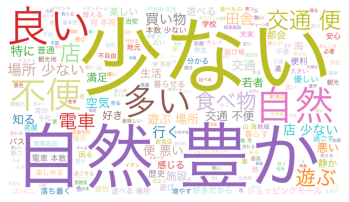

In [74]:
#ワードクラウドの作成
from matplotlib import pyplot as plt
from wordcloud import WordCloud
 
# w = WordCloud(background_color="white", width=600, height=400, min_font_size=15)

wc = WordCloud(
        font_path = "~/Library/Fonts/ヒラギノ角ゴシック W3.ttc",
        width=1920, 
        height=1080,
        prefer_horizontal=1,
        background_color='white',
        include_numbers=True,
        colormap='tab20',
        regexp=r"[\w']+",
    ).generate_from_text(result)

plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('./student_14.png')

In [73]:
# 頻出単語を出力
mine = Counter(words)
for i in mine.most_common():
    print(i)

# values, counts = zip(*mine.most_common())
# values
# counts

('少ない', 175)
('自然', 138)
('交通', 88)
('豊か', 76)
('不便', 74)
('場所', 69)
('良い', 68)
('店', 65)
('遊ぶ', 58)
('多い', 49)
('便', 46)
('悪い', 43)
('電車', 41)
('食べ物', 37)
('田舎', 28)
('行く', 28)
('買い物', 27)
('遊べる', 26)
('特に', 25)
('海', 24)
('生活', 24)
('空気', 23)
('知る', 21)
('若者', 20)
('満足', 19)
('施設', 19)
('好き', 18)
('都会', 16)
('静か', 16)
('楽しい', 16)
('本数', 14)
('感じる', 14)
('普通', 13)
('山', 12)
('歴史', 12)
('便利', 12)
('優しい', 12)
('他', 12)
('ショッピングモール', 12)
('不自由', 11)
('暮らせる', 11)
('好きだから', 11)
('暮らす', 11)
('バス', 10)
('可', 10)
('不可', 10)
('落ち着く', 10)
('市', 10)
('近い', 10)
('駅', 9)
('遊び', 9)
('安心', 9)
('分かる', 9)
('学校', 9)
('遊び場', 8)
('発展', 8)
('過ごす', 8)
('楽しめる', 8)
('建物', 8)
('増える', 8)
('地元', 8)
('充実', 8)
('困る', 8)
('魚', 7)
('学生', 7)
('増やす', 7)
('平和', 7)
('治安', 7)
('道', 7)
('不満', 7)
('悪意', 7)
('自分', 7)
('車', 7)
('観光', 6)
('地域', 6)
('遠い', 6)
('大きい', 6)
('観光地', 6)
('商業施設', 6)
('魅力', 6)
('キレイ', 5)
('食べもの', 5)
('子供', 5)
('コンビニ', 5)
('場', 5)
('飲食店', 5)
('必要', 5)
('欲しい', 4)
('基本的', 4)
('感じ', 4)
('医療', 4)
('過ごせる', 

In [75]:
len(words)

2569